# **Load and inspect the dataset**

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Read the dataset (adjust filename if needed)
df = pd.read_csv("/content/Phishing_Email.csv")  # replace 'emails.csv' if actual file name is different

# Preview
print("Shape:", df.shape)
df.head()


Shape: (18650, 3)


,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


# **Check for missing values and data types**

In [ ]:
# Check data types
print(df.dtypes)

# Null value count
print("\nMissing values:\n", df.isnull().sum())


Unnamed: 0     int64
Email Text    object
Email Type    object
dtype: object

Missing values:
 Unnamed: 0     0
Email Text    16
Email Type     0
dtype: int64


 # **Preprocess the dataset**

In [ ]:
# Preprocess the dataset
df = df.rename(columns={"Email Text": "email_text", "Email Type": "label"})

df.drop(columns=["Unnamed: 0"], inplace=True)

In [ ]:
df

In [38]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download required resources
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\n+', ' ', text)                      # Remove newlines
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)   # Remove URLs
    text = re.sub(r'\d+', '', text)                       # Remove digits
    text = re.sub(r'[^\w\s]', '', text)                   # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()              # Remove extra spaces
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

# Apply cleaning
df['clean_text'] = df['email_text'].astype(str).apply(clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [39]:
df['clean_text']

,clean_text
0,disc uniformitarianism sex lang dick hudson ob...
1,side galicismos galicismo spanish term name im...
2,equistar deal ticket still available assist ro...
3,hello hot lil horny toy one dream open minded ...
4,software incredibly low price lower drapery se...
...,...
18645,date lonely housewife always wanted date lonel...
18646,request submitted access request anita dupont ...
18647,important prc mtg hi dorn john discovered rece...
18648,press clipping letter californian utility plea...


In [40]:
df['text_length'] = df['clean_text'].apply(len)
df['word_count'] = df['clean_text'].apply(lambda x: len(x.split()))

In [41]:
df

,email_text,label,clean_text,text_length,word_count
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email,disc uniformitarianism sex lang dick hudson ob...,571,82
1,the other side of * galicismos * * galicismo *...,Safe Email,side galicismos galicismo spanish term name im...,312,41
2,re : equistar deal tickets are you still avail...,Safe Email,equistar deal ticket still available assist ro...,690,115
3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email,hello hot lil horny toy one dream open minded ...,325,45
4,software at incredibly low prices ( 86 % lower...,Phishing Email,software incredibly low price lower drapery se...,357,57
...,...,...,...,...,...
18645,date a lonely housewife always wanted to date ...,Phishing Email,date lonely housewife always wanted date lonel...,173,24
18646,request submitted : access request for anita ....,Safe Email,request submitted access request anita dupont ...,328,48
18647,"re : important - prc mtg hi dorn & john , as y...",Safe Email,important prc mtg hi dorn john discovered rece...,748,104
18648,press clippings - letter on californian utilit...,Safe Email,press clipping letter californian utility plea...,180,23


<ipython-input-42-2907696289>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='pastel')


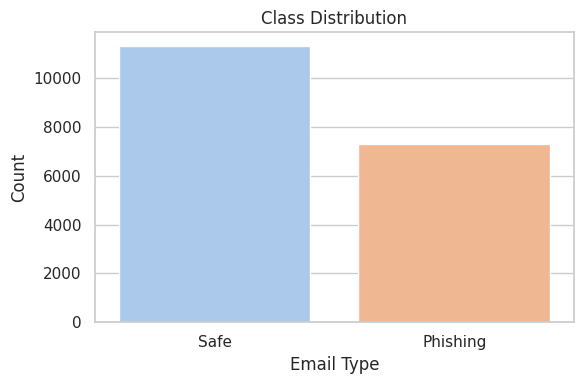

In [42]:
# Plot 1: Class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df, palette='pastel')
plt.title("Class Distribution")
plt.xticks([0, 1], ['Safe', 'Phishing'])
plt.xlabel("Email Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

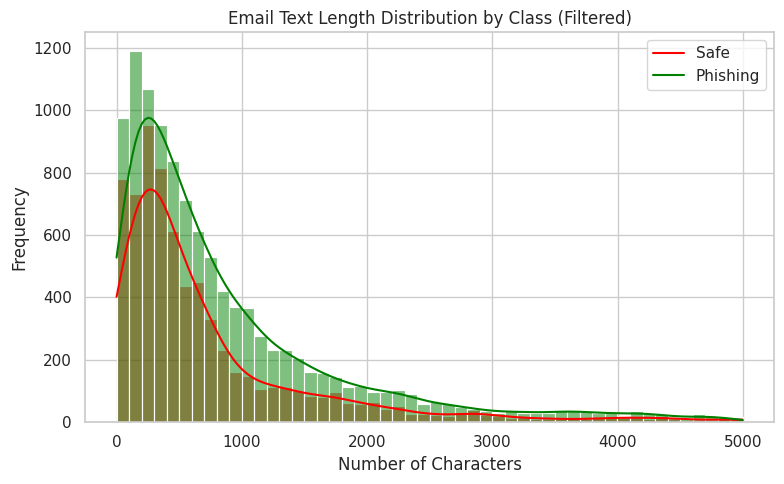

In [44]:
# Filter out outliers with text length > 5000 characters
df_filtered = df[df['text_length'] < 5000]

plt.figure(figsize=(8, 5))
sns.histplot(data=df_filtered, x='text_length', hue='label', bins=50, kde=True, palette=['green', 'red'])
plt.title("Email Text Length Distribution by Class (Filtered)")
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")
plt.legend(labels=['Safe', 'Phishing'])
plt.tight_layout()
plt.show()



<ipython-input-46-3586836757>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='text_length', data=df_filtered, palette='Set2')


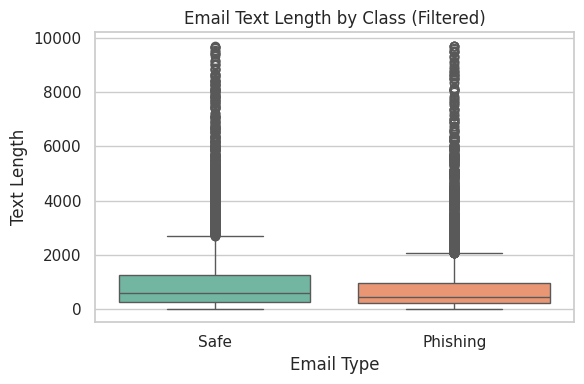

In [46]:


# Filter extreme outliers based on 99th percentile
max_length = df['text_length'].quantile(0.99)
df_filtered = df[df['text_length'] < max_length]

# Plot boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x='label', y='text_length', data=df_filtered, palette='Set2')
plt.title("Email Text Length by Class (Filtered)")
plt.xticks([0, 1], ['Safe', 'Phishing'])
plt.xlabel("Email Type")
plt.ylabel("Text Length")
plt.tight_layout()
plt.show()



<ipython-input-49-890974522>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='word_count', data=df_filtered, palette='Set3')


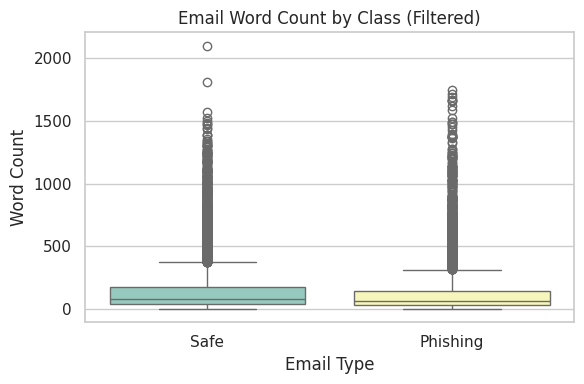

In [49]:
# Plot boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x='label', y='word_count', data=df_filtered, palette='Set3')
plt.title("Email Word Count by Class (Filtered)")
plt.xticks([0, 1], ['Safe', 'Phishing'])
plt.xlabel("Email Type")
plt.ylabel("Word Count")
plt.tight_layout()
plt.show()